The dataset and its description can be found at this link:
https://www.kaggle.com/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("tmdb_5000_movies.csv")

In [3]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
df.shape

(4803, 20)

In [5]:
df.drop(columns = ["id", "homepage", "keywords", "overview", "tagline"], inplace=True)

#dropped 5 columns not relevant for the analysis

In [6]:
df.shape

(4803, 15)

In [7]:
df.dtypes

budget                    int64
genres                   object
original_language        object
original_title           object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [8]:
df["release_date"] = pd.to_datetime(df.release_date)

#converted dtype for release_date column into datetime

In [9]:
df.dtypes

budget                           int64
genres                          object
original_language               object
original_title                  object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
status                          object
title                           object
vote_average                   float64
vote_count                       int64
dtype: object

In [10]:
df["year"] = df.release_date.dt.year
df["month"] = df.release_date.dt.month
df["day"] = df.release_date.dt.day

#created three new columns for better analysis

In [11]:
df.isna().sum()

budget                  0
genres                  0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
year                    1
month                   1
day                     1
dtype: int64

In [12]:
df.dropna(how= "any", inplace=True)

#dropped 3 row that had na values....dropped 3 rows out of 4803 rows (insignificant impact)

In [13]:
df = df.astype({"year": int, "month": int, "day": int})

#changed dtype for the 3 newly created columns

In [14]:
df.dtypes

#check new dtypes

budget                           int64
genres                          object
original_language               object
original_title                  object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
status                          object
title                           object
vote_average                   float64
vote_count                       int64
year                             int64
month                            int64
day                              int64
dtype: object

In [15]:
df["genres"] = df.genres.str.slice(start=20)

In [16]:
df["genres"] = df.genres.str.split("}").str[0]

In [17]:
df["genres"] = df.genres.str[1:-1]

#kept only the first genre (assumption: first genre is the main one)

In [18]:
df.drop(columns="spoken_languages", inplace=True)

In [19]:
df.head()

,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,year,month,day
0,237000000,Action,en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800,2009,12,10
1,300000000,Adventure,en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500,2007,5,19
2,245000000,Action,en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Released,Spectre,6.3,4466,2015,10,26
3,250000000,Action,en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,Released,The Dark Knight Rises,7.6,9106,2012,7,16
4,260000000,Action,en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,Released,John Carter,6.1,2124,2012,3,7


In [20]:
df["production_companies"] = df.production_companies.str.slice(start=11)

In [21]:
df["production_companies"] = df.production_companies.str.split(",").str[0]

In [22]:
df["production_companies"] = df.production_companies.str[:-1]

#kept only the first production company

In [23]:
df["production_countries"] = df.production_countries.str.slice(start=17)

In [24]:
df["production_countries"] = df.production_countries.str.split(",").str[0]

In [25]:
df["production_countries"] = df.production_countries.str[:-1]

#kept only the first prodcution country

In [26]:
df.genres.replace(to_replace= '"Science Fiction', value= "Science Fiction", inplace=True)

In [27]:
df.genres.replace(to_replace= ': "Family', value= "Family", inplace=True)

In [28]:
df.genres.replace(to_replace= ': "War', value= "War", inplace=True)

In [29]:
df.genres.replace(to_replace= ': "Romance', value= "Romance", inplace=True)

In [30]:
df.genres.replace(to_replace= ' "Mystery"', value= "Mystery", inplace=True)

In [31]:
df.genres.replace(to_replace= ': "Music', value= "Music", inplace=True)

In [32]:
df.genres.replace(to_replace= ': "TV Movie', value= "TV Movie", inplace=True)

In [33]:
df.genres.replace(to_replace= ': "Foreign', value= "Foreign", inplace=True)

In [34]:
df.genres.replace(to_replace= ' "Mystery', value= "Mystery", inplace=True)

In [35]:
df.genres.unique()

array(['Action', 'Adventure', 'Fantasy', 'Animation', 'Science Fiction',
       'Drama', 'Thriller', 'Family', 'Comedy', 'History', 'War',
       'Western', 'Romance', 'Crime', 'Mystery', 'Horror', 'Documentary',
       'Music', 'TV Movie', '', 'Foreign'], dtype=object)

In [36]:
no_genre = df.loc[df.genres == ""].index

In [37]:
df.drop(index=no_genre, inplace=True)

In [38]:
no_production_country = df.loc[df.production_countries == ""].index

In [39]:
df.drop(index = no_production_country, inplace=True)

In [40]:
all_zero = df.loc[(df.runtime == 0) & (df.budget == 0) & (df.revenue == 0)].index

In [41]:
df.drop(index = all_zero, inplace=True)

In [42]:
revenue_budget_zero = df.loc[(df.budget == 0) & (df.revenue == 0)].index

In [43]:
df.drop(index = revenue_budget_zero, inplace=True)

#dropped columns with both budget and revenues equal to zero...I assumed vaues were wrong

In [44]:
df.year.describe()

#the dataset contains movies from 1916 to 2016

count    3862.00000
mean     2002.17478
std        12.77321
min      1916.00000
25%      1999.00000
50%      2005.00000
75%      2011.00000
max      2016.00000
Name: year, dtype: float64

In [45]:
df.original_language.nunique()

#the dataset contains movies of 30 different languages

30

In [46]:
df.genres.unique()

#unique list of genres

array(['Action', 'Adventure', 'Fantasy', 'Animation', 'Science Fiction',
       'Drama', 'Thriller', 'Family', 'Comedy', 'History', 'War',
       'Western', 'Romance', 'Crime', 'Mystery', 'Horror', 'Documentary',
       'Music', 'TV Movie', 'Foreign'], dtype=object)

In [47]:
df[["original_title", "vote_average"]].sort_values(by="vote_average", ascending=False).head(10)

#10 movies with the highest average vote

,original_title,vote_average
4045,"Dancer, Texas Pop. 81",10.0
1881,The Shawshank Redemption,8.5
2970,There Goes My Baby,8.5
3337,The Godfather,8.4
4755,Counting,8.3
2731,The Godfather: Part II,8.3
3232,Pulp Fiction,8.3
3865,Whiplash,8.3
1818,Schindler's List,8.3
2294,千と千尋の神隠し,8.3


In [48]:
df[["original_title", "vote_average"]].sort_values(by="vote_average").head(10)

#10 movies with the lowest average vote

,original_title,vote_average
3967,Four Single Fathers,0.0
4638,Amidst the Devil's Wings,0.0
4065,Mi America,0.0
4556,El Rey de Najayo,0.0
4626,Anderson's Cross,0.0
4486,Naturally Native,0.0
3855,Time to Choose,0.0
2220,Superbabies: Baby Geniuses 2,1.9
4791,Tin Can Man,2.0
1101,Foodfight!,2.3


In [49]:

df[["original_title", "budget"]].sort_values(by="budget", ascending=False).head(10)

#10 movies with the highest budget

#first two movies belong to the Pirates of the Caribbean saga

,original_title,budget
17,Pirates of the Caribbean: On Stranger Tides,380000000
1,Pirates of the Caribbean: At World's End,300000000
7,Avengers: Age of Ultron,280000000
10,Superman Returns,270000000
4,John Carter,260000000
6,Tangled,260000000
5,Spider-Man 3,258000000
13,The Lone Ranger,255000000
46,X-Men: Days of Future Past,250000000
22,The Hobbit: The Desolation of Smaug,250000000


In [50]:
df[["original_title", "budget"]].sort_values(by="budget").head(10)

#10 movies with the lowest budget

,original_title,budget
3935,Frances Ha,0
2419,"McFarland, USA",0
2393,Madea Goes to Jail,0
3230,Repo! The Genetic Opera,0
2342,Observe and Report,0
3233,The Muppet Movie,0
3262,Enough Said,0
4087,American Splendor,0
3264,The Inkwell,0
3270,Howards End,0


In [51]:

df[["original_title", "genres","revenue"]].sort_values(by="revenue", ascending=False).head(10)

#10 movies with the highest revenue

#5 out of 10 are action movies

,original_title,genres,revenue
0,Avatar,Action,2787965087
25,Titanic,Drama,1845034188
16,The Avengers,Science Fiction,1519557910
28,Jurassic World,Action,1513528810
44,Furious 7,Action,1506249360
7,Avengers: Age of Ultron,Action,1405403694
124,Frozen,Animation,1274219009
31,Iron Man 3,Action,1215439994
546,Minions,Family,1156730962
26,Captain America: Civil War,Adventure,1153304495


In [52]:
df[["original_title", "revenue"]].sort_values(by="revenue").head(10)

#10 movies with the lowest revenue

,original_title,revenue
996,Death to Smoochy,0
3965,Never Back Down 2: The Beatdown,0
3962,Open Road,0
3955,Just Looking,0
3952,Sommersturm,0
2274,Survivor,0
2273,Hands of Stone,0
467,Mighty Joe Young,0
3324,Outside Bet,0
3944,Freeway,0


In [53]:
df[["original_title", "popularity"]].sort_values(by="popularity", ascending=False).head(10)

#10 movies with the highest popularity

,original_title,popularity
546,Minions,875.581305
95,Interstellar,724.247784
788,Deadpool,514.569956
94,Guardians of the Galaxy,481.098624
127,Mad Max: Fury Road,434.278564
28,Jurassic World,418.708552
199,Pirates of the Caribbean: The Curse of the Bla...,271.972889
82,Dawn of the Planet of the Apes,243.791743
200,The Hunger Games: Mockingjay - Part 1,206.227151
88,Big Hero 6,203.734590


In [54]:
df[["original_title", "popularity"]].sort_values(by="popularity").head(10)

#10 movies with the lowest popularity

,original_title,popularity
4509,Love Letters,0.001586
4626,Anderson's Cross,0.006323
3967,Four Single Fathers,0.008263
3708,Karakter,0.011697
4638,Amidst the Devil's Wings,0.018087
3921,Woman Thou Art Loosed,0.019984
4774,Pink Narcissus,0.027811
2970,There Goes My Baby,0.037073
4065,Mi America,0.039007
3471,Dolphins and Whales: Tribes of the Ocean,0.041651


In [55]:
df["gross_profit"] = df.revenue - df.budget

In [56]:
df[["original_title", "genres", "gross_profit"]].sort_values(by="gross_profit", ascending=False).head(10)

#10 movies with the highest gross profit

#5 out of 10 are action movies

,original_title,genres,gross_profit
0,Avatar,Action,2550965087
25,Titanic,Drama,1645034188
28,Jurassic World,Action,1363528810
44,Furious 7,Action,1316249360
16,The Avengers,Science Fiction,1299557910
7,Avengers: Age of Ultron,Action,1125403694
124,Frozen,Animation,1124219009
546,Minions,Family,1082730962
329,The Lord of the Rings: The Return of the King,Adventure,1024888979
31,Iron Man 3,Action,1015439994


In [57]:
df[["original_title", "genres", "gross_profit"]].sort_values(by="gross_profit").head(10)

#10 movies with the lowest gross profit

,original_title,genres,gross_profit
13,The Lone Ranger,Action,-165710090
135,The Wolfman,Drama,-150000000
338,The Alamo,Western,-119180039
141,Mars Needs Moms,Adventure,-111007242
1652,Dragonball Evolution,Action,-100000000
208,The 13th Warrior,Adventure,-98301101
311,The Adventures of Pluto Nash,Action,-92896027
2638,Metropolis,Drama,-91969578
467,Mighty Joe Young,Action,-90000000
376,Volcano,Science Fiction,-90000000


In [58]:
df[["original_title", "runtime"]].sort_values(by="runtime", ascending=False).head(10)

#10 movies with the highest runtime

,original_title,runtime
2384,Carlos,338.0
1922,Gettysburg,254.0
1125,Cleopatra,248.0
3813,Gone with the Wind,238.0
1663,Once Upon a Time in America,229.0
4497,Woodstock,225.0
1109,Heaven's Gate,219.0
2550,Lawrence of Arabia,216.0
855,Gods and Generals,214.0
4535,七人の侍,207.0


In [59]:
df[["original_title", "runtime"]].sort_values(by="runtime").head(10)

#10 movies with the lowest runtime

,original_title,runtime
3809,How to Fall in Love,0.0
3626,Sea Rex 3D: Journey to a Prehistoric World,41.0
3471,Dolphins and Whales: Tribes of the Ocean,42.0
3354,Michael Jordan to the Max,46.0
4756,The Call of Cthulhu,47.0
1620,Winnie the Pooh,63.0
4774,Pink Narcissus,64.0
4673,She Done Him Wrong,66.0
3663,Henry & Me,67.0
2805,The Land Before Time,69.0


In [60]:
pd.options.display.float_format = '{:,.2f}'.format
df.groupby("genres").revenue.mean().sort_values(ascending=False)

#genres ordered by average revenue

genres
Animation         277,850,822.25
Adventure         229,210,976.40
Family            212,557,685.81
Science Fiction   185,955,703.16
Fantasy           162,871,983.87
Action            137,310,925.98
Mystery            88,775,851.66
History            86,638,115.00
Romance            81,041,450.76
Thriller           78,749,719.03
War                73,962,354.29
Comedy             67,699,543.83
Drama              59,183,779.53
Western            55,766,623.46
Horror             55,364,709.46
Crime              54,791,465.84
Music              39,922,966.22
Documentary        18,061,837.93
Foreign               111,300.00
TV Movie                    0.00
Name: revenue, dtype: float64

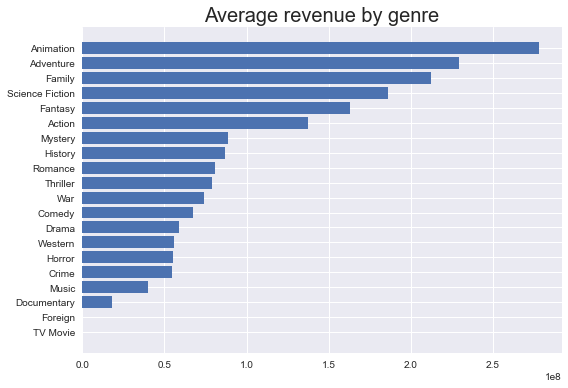

In [61]:

plt.style.use("seaborn")
plt.barh(df.groupby("genres").revenue.mean().sort_values().index, df.groupby("genres").revenue.mean().sort_values().values)
plt.title("Average revenue by genre", fontdict={"fontsize":20})

plt.tight_layout()

In [62]:
pd.options.display.float_format = '{:,.2f}'.format
df.groupby("genres").budget.mean().sort_values(ascending=False)

#genres ordered by average budget

genres
Animation         77,308,713.58
Adventure         71,249,460.69
Fantasy           57,990,932.37
Family            56,925,661.90
Science Fiction   54,370,482.79
Action            53,642,006.57
War               41,773,809.52
Thriller          32,152,215.00
History           29,051,666.67
Mystery           28,666,562.50
Western           26,080,157.62
Romance           25,316,047.67
Crime             24,526,896.82
Comedy            24,485,416.64
Drama             23,412,772.68
Music             19,535,605.93
Horror            14,515,331.61
Documentary        3,947,566.58
TV Movie           1,000,000.00
Foreign              225,000.00
Name: budget, dtype: float64

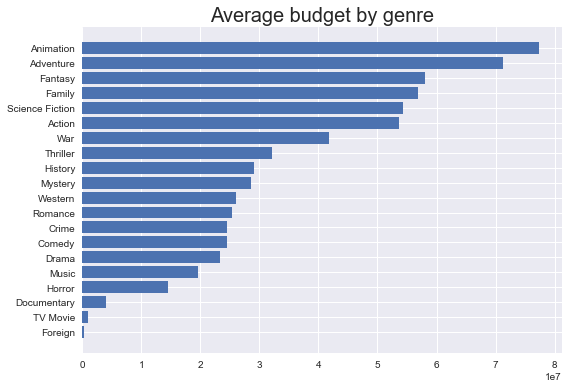

In [63]:
plt.style.use("seaborn")
plt.barh(df.groupby("genres").budget.mean().sort_values().index, df.groupby("genres").budget.mean().sort_values().values)
plt.title("Average budget by genre", fontdict={"fontsize":20})
plt.tight_layout()


In [64]:
pd.options.display.float_format = '{:,.2f}'.format
df.groupby("genres").gross_profit.mean().sort_values(ascending=False)

#genres ordered by average gross profit

genres
Animation         200,542,108.67
Adventure         157,961,515.71
Family            155,632,023.90
Science Fiction   131,585,220.37
Fantasy           104,881,051.50
Action             83,668,919.41
Mystery            60,109,289.16
History            57,586,448.33
Romance            55,725,403.08
Thriller           46,597,504.03
Comedy             43,214,127.19
Horror             40,849,377.85
Drama              35,771,006.85
War                32,188,544.76
Crime              30,264,569.02
Western            29,686,465.83
Music              20,387,360.30
Documentary        14,114,271.35
Foreign              -113,700.00
TV Movie           -1,000,000.00
Name: gross_profit, dtype: float64

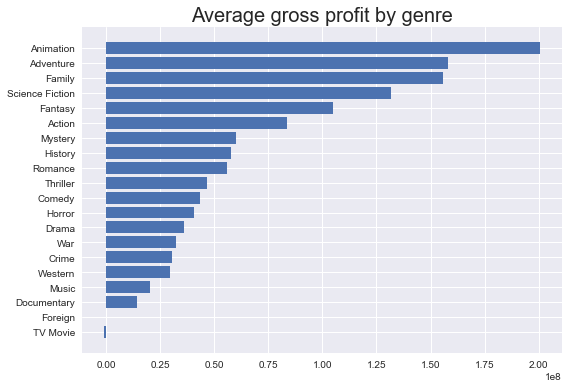

In [65]:
plt.style.use("seaborn")
plt.barh(df.groupby("genres").gross_profit.mean().sort_values().index, df.groupby("genres").gross_profit.mean().sort_values().values)
plt.title("Average gross profit by genre", fontdict={"fontsize":20})

plt.tight_layout()

In [66]:
df.head()

,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,year,month,day,gross_profit
0,237000000,Action,en,Avatar,150.44,Ingenious Film Partners,US,2009-12-10,2787965087,162.00,Released,Avatar,7.20,11800,2009,12,10,2550965087
1,300000000,Adventure,en,Pirates of the Caribbean: At World's End,139.08,Walt Disney Pictures,US,2007-05-19,961000000,169.00,Released,Pirates of the Caribbean: At World's End,6.90,4500,2007,5,19,661000000
2,245000000,Action,en,Spectre,107.38,Columbia Pictures,GB,2015-10-26,880674609,148.00,Released,Spectre,6.30,4466,2015,10,26,635674609
3,250000000,Action,en,The Dark Knight Rises,112.31,Legendary Pictures,US,2012-07-16,1084939099,165.00,Released,The Dark Knight Rises,7.60,9106,2012,7,16,834939099
4,260000000,Action,en,John Carter,43.93,Walt Disney Pictures,US,2012-03-07,284139100,132.00,Released,John Carter,6.10,2124,2012,3,7,24139100


Text(0.5, 1.0, 'Distribution of movies by their budget')

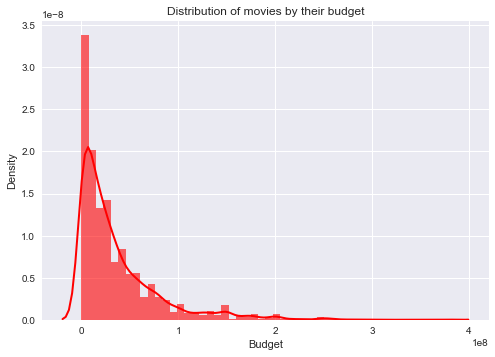

In [67]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
sns.distplot(df.budget, color="red",**kwargs, norm_hist=True)

plt.ylabel("Density")
plt.xlabel("Budget")
#plt.xticks(ticks=bins, labels=bins)

plt.title("Distribution of movies by their budget")

Text(0.5, 1.0, 'Distribution of movies by their revenue')

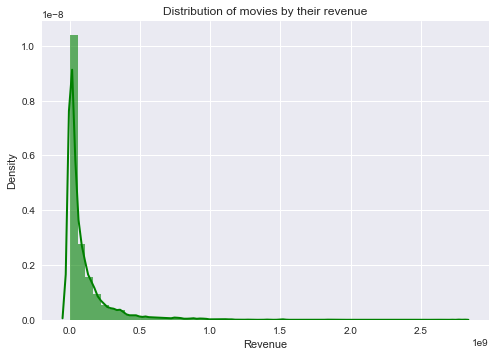

In [68]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
sns.distplot(df.revenue, color="green",**kwargs, norm_hist=True)

plt.ylabel("Density")
plt.xlabel("Revenue")
#plt.xticks(ticks=bins, labels=bins)

plt.title("Distribution of movies by their revenue")

Text(0.5, 1.0, 'Distribution of movies by the runtime')

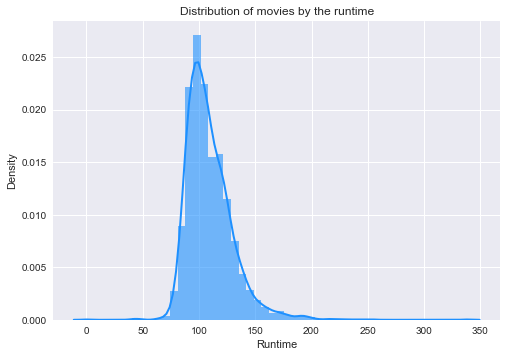

In [69]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
sns.distplot(df.runtime, color="dodgerblue",**kwargs, norm_hist=True)

plt.ylabel("Density")
plt.xlabel("Runtime")
#plt.xticks(ticks=bins, labels=bins)

plt.title("Distribution of movies by the runtime")

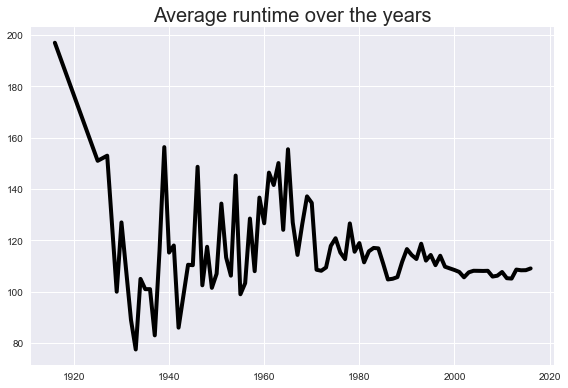

In [70]:
plt.style.use("seaborn")
plt.plot(df.groupby("year").runtime.mean().index,df.groupby("year").runtime.mean().values, color="black", linewidth=4)
plt.title("Average runtime over the years",fontdict={"fontsize": 20})
plt.tight_layout()

#while the average runtime changed significantly between 1920 and 1980 it has been quite steady in the last 20 years (110 minutes ish)


In [71]:
action = df.loc[df.genres == "Action"]
adventure = df.loc[df.genres == "Adventure"]
animation = df.loc[df.genres == "Animation"]
science_fiction = df.loc[df.genres == "Science Fiction"]
western = df.loc[df.genres == "Western"]
documentary = df.loc[df.genres == "Documentary"]


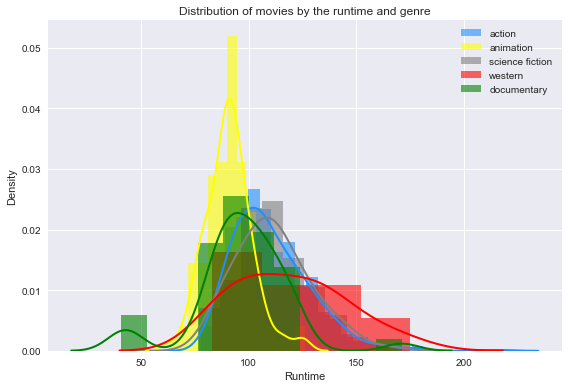

In [72]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
sns.distplot(action.runtime, color="dodgerblue",label= "action", **kwargs, norm_hist=True)
sns.distplot(animation.runtime, color="yellow",label= "animation",**kwargs, norm_hist=True)
sns.distplot(science_fiction.runtime, color="grey",label="science fiction",**kwargs, norm_hist=True)
sns.distplot(western.runtime, color="red",label="western",**kwargs, norm_hist=True)
sns.distplot(documentary.runtime, color="green",label="documentary",**kwargs, norm_hist=True)

plt.ylabel("Density")
plt.xlabel("Runtime")
plt.legend()
#plt.xticks(ticks=bins, labels=bins)

plt.title("Distribution of movies by the runtime and genre")
plt.tight_layout()

#it is interesting to see how the distribution of movies by runtime varies from one genre to another

#it is also interesting to see that while animation movies tend to last less than the other genres they are also those with the biggest profit

In [73]:
pd.options.display.float_format = '{:,.2f}'.format
df.groupby("production_companies").budget.mean().sort_values(ascending=False).head(10)

#top 10 production companies according to the average budget

production_companies
Mid Atlantic Films               175,000,000.00
Marvel Studios                   175,000,000.00
Todma                            170,000,000.00
Golden Mean                      165,000,000.00
Walt Disney Animation Studios    155,000,000.00
Patalex IV Productions Limited   150,000,000.00
DreamWorks Animation             140,142,857.14
WingNut Films                    132,300,000.00
DC Comics                        126,050,000.00
Pacific Data Images (PDI)        125,000,000.00
Name: budget, dtype: float64

In [74]:
pd.options.display.float_format = '{:,.2f}'.format
df.groupby("production_companies").gross_profit.mean().sort_values(ascending=False).head(10)

#top 10 production companies according to the average gross profit

production_companies
Patalex IV Productions Limited   745,921,036.00
1492 Pictures                    593,136,834.25
Marvel Studios                   555,182,620.10
Pixar Animation Studios          539,338,880.00
WingNut Films                    538,646,243.10
Blue Sky Studios                 431,631,664.38
Lightstorm Entertainment         420,000,000.00
Lucasfilm                        415,022,121.43
Home Box Office (HBO)            363,744,044.00
DreamWorks Animation             344,342,136.79
Name: gross_profit, dtype: float64

In [75]:
#it is interesting that two out of the first three production companies by average budget (Mid Atlantic Films and Todma) do not appear in the top 10 production companies by average gross profit 



In [76]:
df.loc[(df.production_companies == "Todma") | (df.production_companies == "Mid Atlantic Films")]

,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,year,month,day,gross_profit
70,170000000,Action,en,Wild Wild West,40.75,Todma,US,1999-06-29,222104681,106.00,Released,Wild Wild West,5.10,1020,1999,6,29,52104681
84,175000000,Drama,en,47 Ronin,41.80,Mid Atlantic Films,US,2013-12-06,150962475,119.00,Released,47 Ronin,5.90,1326,2013,12,6,-24037525


In [77]:
#there's only 1 movie with Todma as production company...which ended up been profitable
#there's only 1 movie with Mid Atlantic Films as production company (47 Ronin) which hasn't been profitable

In [78]:
df.groupby("production_companies").runtime.mean().sort_values(ascending=False).head(10)

#top 10 production companies based on the average runtime of their movies

production_companies
Egoli Tossell Film AG                    338.00
TriStar Television                       254.00
Wadleigh-Maurice                         225.00
Horizon Pictures (II)                    216.00
Toho Company                             207.00
JVC Entertainment                        202.00
George Stevens Productions               199.00
Triangle Film Corporation                197.00
Barclays Mercantile Industrial Finance   195.00
Big Talk Productions                     191.00
Name: runtime, dtype: float64

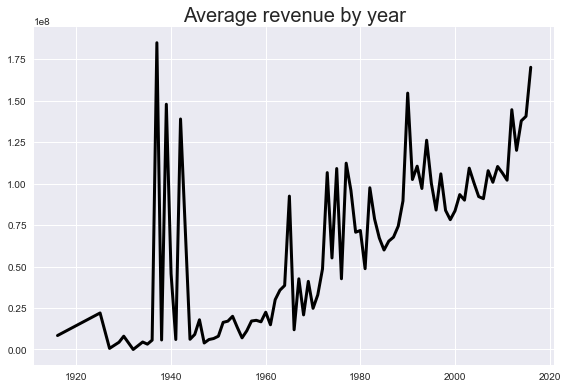

In [79]:
plt.style.use("seaborn")
plt.plot(df.groupby("year").revenue.mean().index,df.groupby("year").revenue.mean().values, color="black", linewidth=3)
plt.title("Average revenue by year",fontdict={"fontsize": 20})
plt.tight_layout()

#after a significant dropped around the 90s the average revenues has increased reaching a level higher than that of the 90s


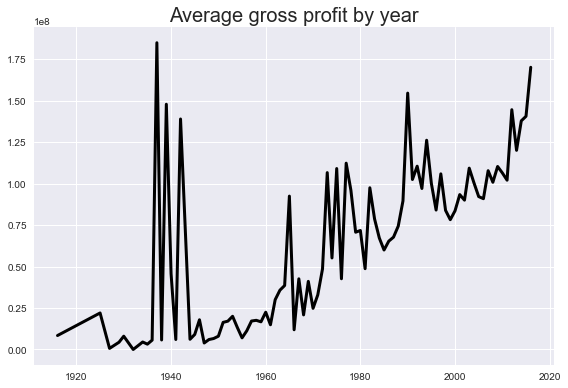

In [80]:
plt.style.use("seaborn")
plt.plot(df.groupby("year").gross_profit.mean().index,df.groupby("year").revenue.mean().values, color="black", linewidth=3)
plt.title("Average gross profit by year",fontdict={"fontsize": 20})
plt.tight_layout()

#the average gross profit, like the average revenue, has dropped in the 90s but has now icreased again to a level higher thant that of the 90s

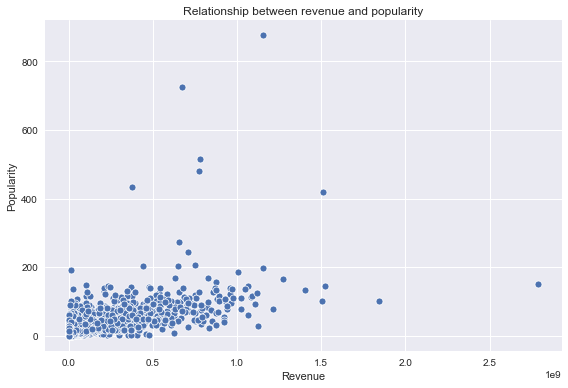

In [81]:
import seaborn as sns
plt.style.use('seaborn')


#neighbourhood_group = df['neighbourhood_group']

sns.scatterplot(data= df, x=df.revenue, y=df.popularity,palette='GnBu_d')


plt.title('Relationship between revenue and popularity')
plt.xlabel('Revenue')
plt.ylabel('Popularity')
plt.tight_layout()

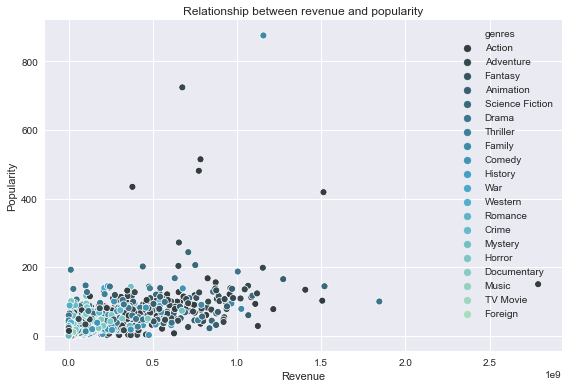

In [82]:
import seaborn as sns
plt.style.use('seaborn')

genre = df['genres']
sns.scatterplot(data= df, x=df.revenue, y=df.popularity,hue= genre, palette='GnBu_d')


plt.title('Relationship between revenue and popularity')
plt.xlabel('Revenue')
plt.ylabel('Popularity')
plt.tight_layout()

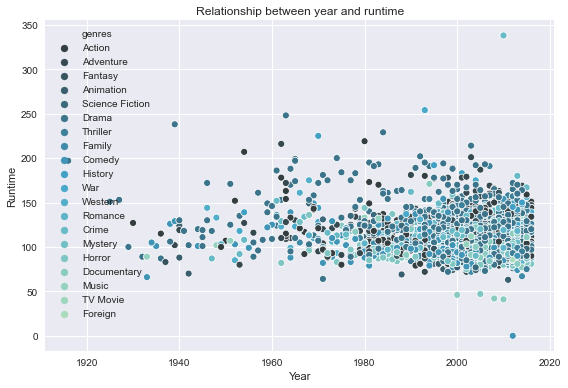

In [84]:
import seaborn as sns
plt.style.use('seaborn')


genre = df['genres']

sns.scatterplot(data= df, x=df.year, y=df.runtime,hue= genre, palette='GnBu_d')


plt.title('Relationship between year and runtime')
plt.xlabel('Year')
plt.ylabel('Runtime')
plt.tight_layout()

In [85]:
df.groupby("month").revenue.mean().sort_values(ascending=False)

#avergae revenue by month
#juve, may and november are the months with the highest avg revenue
#january, august and september by contrast are the month with the lowest avg revenue

month
6    185,694,951.44
5    162,595,381.69
11   145,880,318.42
7    130,559,400.06
12   128,839,358.41
4     95,793,684.06
3     91,240,978.43
10    68,230,210.46
2     68,028,403.20
8     67,373,055.16
9     50,892,147.67
1     44,816,304.05
Name: revenue, dtype: float64

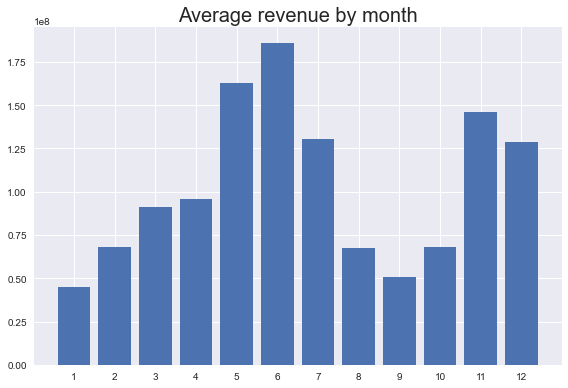

In [86]:
plt.style.use("seaborn")
plt.bar(df.groupby("month").revenue.mean().sort_values().index, df.groupby("month").revenue.mean().sort_values().values)
plt.title("Average revenue by month", fontdict={"fontsize":20})
plt.xticks(ticks=df.groupby("month").revenue.mean().sort_values().index)
plt.tight_layout()

#we can see that june and may are the 2 moth with the highest average revenue
#by contrat january and september are the 2 months with the lowest average revenue

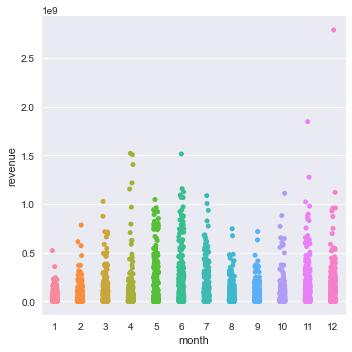

In [87]:
sns.catplot(x = "month", y = "revenue", data=df)

In [ ]:
sns.catplot(x = "month", y = "revenue", data=df)

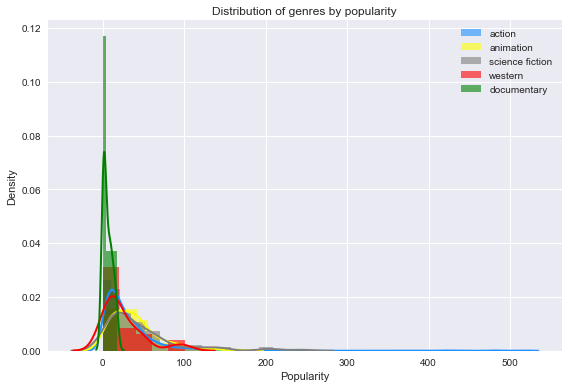

In [88]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
sns.distplot(action.popularity, color="dodgerblue",label= "action", **kwargs, norm_hist=True)
sns.distplot(animation.popularity, color="yellow",label= "animation",**kwargs, norm_hist=True)
sns.distplot(science_fiction.popularity, color="grey",label="science fiction",**kwargs, norm_hist=True)
sns.distplot(western.popularity, color="red",label="western",**kwargs, norm_hist=True)
sns.distplot(documentary.popularity, color="green",label="documentary",**kwargs, norm_hist=True)

plt.ylabel("Density")
plt.xlabel("Popularity")
plt.legend()
#plt.xticks(ticks=bins, labels=bins)

plt.title("Distribution of genres by popularity")
plt.tight_layout()

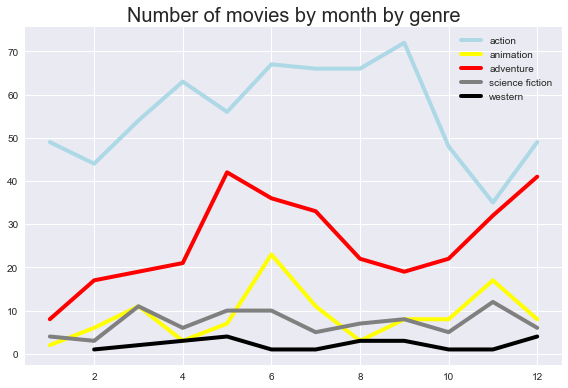

In [89]:
plt.style.use("seaborn")
plt.plot(action.groupby("month").title.count().index,action.groupby("month").title.count().values, color="lightblue",label="action", linewidth=4)
plt.plot(animation.groupby("month").title.count().index,animation.groupby("month").title.count().values, color="yellow", label="animation",linewidth=4)
plt.plot(adventure.groupby("month").title.count().index,adventure.groupby("month").title.count().values, color="red", label="adventure",linewidth=4)
plt.plot(science_fiction.groupby("month").title.count().index,science_fiction.groupby("month").title.count().values, color="grey",label="science fiction", linewidth=4)
plt.plot(western.groupby("month").title.count().index,western.groupby("month").title.count().values, color="black",label="western", linewidth=4)
plt.title("Number of movies by month by genre",fontdict={"fontsize": 20})
plt.legend()
plt.tight_layout()


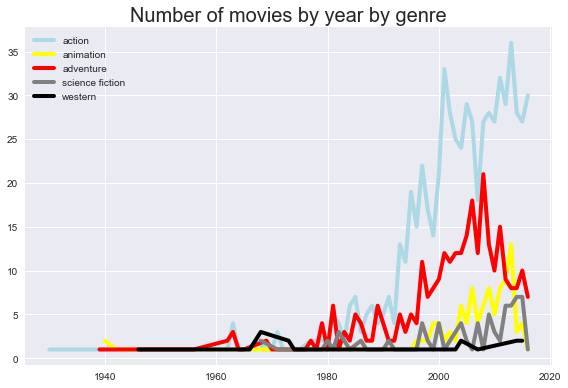

In [90]:
plt.style.use("seaborn")
plt.plot(action.groupby("year").title.count().index,action.groupby("year").title.count().values, color="lightblue",label="action", linewidth=4)
plt.plot(animation.groupby("year").title.count().index,animation.groupby("year").title.count().values, color="yellow", label="animation",linewidth=4)
plt.plot(adventure.groupby("year").title.count().index,adventure.groupby("year").title.count().values, color="red", label="adventure",linewidth=4)
plt.plot(science_fiction.groupby("year").title.count().index,science_fiction.groupby("year").title.count().values, color="grey",label="science fiction", linewidth=4)
plt.plot(western.groupby("year").title.count().index,western.groupby("year").title.count().values, color="black",label="western", linewidth=4)
plt.title("Number of movies by year by genre",fontdict={"fontsize": 20})
plt.legend()
plt.tight_layout()

In [91]:
df.head()

,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,year,month,day,gross_profit
0,237000000,Action,en,Avatar,150.44,Ingenious Film Partners,US,2009-12-10,2787965087,162.00,Released,Avatar,7.20,11800,2009,12,10,2550965087
1,300000000,Adventure,en,Pirates of the Caribbean: At World's End,139.08,Walt Disney Pictures,US,2007-05-19,961000000,169.00,Released,Pirates of the Caribbean: At World's End,6.90,4500,2007,5,19,661000000
2,245000000,Action,en,Spectre,107.38,Columbia Pictures,GB,2015-10-26,880674609,148.00,Released,Spectre,6.30,4466,2015,10,26,635674609
3,250000000,Action,en,The Dark Knight Rises,112.31,Legendary Pictures,US,2012-07-16,1084939099,165.00,Released,The Dark Knight Rises,7.60,9106,2012,7,16,834939099
4,260000000,Action,en,John Carter,43.93,Walt Disney Pictures,US,2012-03-07,284139100,132.00,Released,John Carter,6.10,2124,2012,3,7,24139100


In [92]:
df.groupby("production_countries").revenue.mean().sort_values(ascending=False)

production_countries
JM   562,629,906.00
NZ   384,690,991.74
PH   203,277,636.00
PE   170,362,582.00
IS   169,493,805.00
CN   153,756,780.30
CZ   140,497,077.14
JP   130,424,592.81
GB   123,679,957.15
FI   123,642,790.67
US   107,224,913.15
AU   101,134,397.97
DE    94,777,427.99
IT    77,837,221.17
HK    72,910,243.12
IN    71,687,528.39
MT    69,411,370.00
CA    67,605,055.54
ES    62,069,071.46
FR    59,805,350.98
NO    59,690,445.25
BG    54,388,142.25
AE    53,640,410.00
BS    49,571,511.33
RO    48,633,041.50
MX    40,453,863.79
BE    29,098,950.69
KR    28,412,093.60
IE    26,981,083.68
NL    26,077,554.33
BR    25,727,921.00
HU    23,541,375.50
AT    21,135,637.40
AR    19,599,544.40
TH    18,051,122.00
CH    17,196,434.88
RU    16,517,768.56
ZA    13,017,514.67
IL    11,125,849.00
GR    10,580,647.33
DK     7,960,053.56
ID     4,105,187.00
FJ     2,807,854.00
LU     2,705,374.50
BO       623,528.00
IR       450,000.00
PA             0.00
SE             0.00
DO             0.00

In [93]:
df.loc[df.production_countries == "NZ"]

,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,year,month,day,gross_profit
19,250000000,Action,en,The Hobbit: The Battle of the Five Armies,120.97,WingNut Films,NZ,2014-12-10,956019788,144.00,Released,The Hobbit: The Battle of the Five Armies,7.10,4760,2014,12,10,706019788
22,250000000,Adventure,en,The Hobbit: The Desolation of Smaug,94.37,WingNut Films,NZ,2013-12-11,958400000,161.00,Released,The Hobbit: The Desolation of Smaug,7.60,4524,2013,12,11,708400000
24,207000000,Adventure,en,King Kong,61.23,WingNut Films,NZ,2005-12-14,550000000,187.00,Released,King Kong,6.60,2337,2005,12,14,343000000
98,250000000,Adventure,en,The Hobbit: An Unexpected Journey,108.85,WingNut Films,NZ,2012-11-26,1021103568,169.00,Released,The Hobbit: An Unexpected Journey,7.00,8297,2012,11,26,771103568
190,130000000,Adventure,en,The Adventures of Tintin,89.94,Paramount Pictures,NZ,2011-10-25,371940071,107.00,Released,The Adventures of Tintin,6.70,2061,2011,10,25,241940071
262,93000000,Adventure,en,The Lord of the Rings: The Fellowship of the Ring,138.05,WingNut Films,NZ,2001-12-18,871368364,178.00,Released,The Lord of the Rings: The Fellowship of the Ring,8.00,8705,2001,12,18,778368364
329,94000000,Adventure,en,The Lord of the Rings: The Return of the King,123.63,WingNut Films,NZ,2003-12-01,1118888979,201.00,Released,The Lord of the Rings: The Return of the King,8.10,8064,2003,12,1,1024888979
330,79000000,Adventure,en,The Lord of the Rings: The Two Towers,106.91,WingNut Films,NZ,2002-12-18,926287400,179.00,Released,The Lord of the Rings: The Two Towers,8.00,7487,2002,12,18,847287400
470,85000000,Drama,en,What Dreams May Come,21.89,PolyGram Filmed Entertainment,NZ,1998-10-02,71485043,113.00,Released,What Dreams May Come,6.80,577,1998,10,2,-13514957
523,75000000,Action,en,Vertical Limit,13.32,Columbia Pictures Corporation,NZ,2000-12-08,215663859,124.00,Released,Vertical Limit,5.90,283,2000,12,8,140663859


In [94]:
df.loc[df.production_countries == "JM"]

,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,year,month,day,gross_profit
12,200000000,Adventure,en,Pirates of the Caribbean: Dead Man's Chest,145.85,Walt Disney Pictures,JM,2006-06-20,1065659812,151.00,Released,Pirates of the Caribbean: Dead Man's Chest,7.00,5246,2006,6,20,865659812
4339,950000,Adventure,en,Dr. No,48.90,United Artists,JM,1962-10-04,59600000,110.00,Released,Dr. No,6.90,940,1962,10,4,58650000


In [95]:

df.groupby("production_countries").revenue.sum().sort_values(ascending=False)

production_countries
US    282859320878
GB     36856627230
DE     16775604754
CA     12033699886
FR      8312943786
AU      7382811052
NZ      7309128843
CN      4612703409
JP      4043162377
IN      2007250795
CZ      1966959080
ES      1737934001
IT      1401069981
HK      1166563890
JM      1125259812
MX       768623412
IE       512640590
BE       378286359
AE       375482870
FI       370928372
IS       338987610
KR       284120936
NO       238761781
NL       234697989
BG       217552569
BR       205823368
PH       203277636
PE       170362582
BS       148714534
RU       148659917
CH       137571479
AT       105678187
AR        97997722
RO        97266083
ZA        78105088
DK        71640482
MT        69411370
HU        47082751
TH        36102244
GR        31741942
IL        11125849
LU         5410749
ID         4105187
FJ         2807854
IR          900000
BO          623528
TR               0
AF               0
LY               0
MY               0
AW               0
PA        